In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import obspy
import os
import glob

import hvsrpy
from hvsrpy import utils
%matplotlib inline

In [2]:
def write_mseed(data_X, data_Y, data_Z, filename):
    Trace_X = obspy.Trace()
    Trace_Y = obspy.Trace()
    Trace_Z = obspy.Trace()

    Trace_Z.data = data_Z
    Trace_Y.data = data_Y
    Trace_X.data = data_X

    Trace_X.stats.starttime = obspy.UTCDateTime('2020-01-01T00:00:00.000000Z')
    Trace_Y.stats.starttime = obspy.UTCDateTime('2020-01-01T00:00:00.000000Z')
    Trace_Z.stats.starttime = obspy.UTCDateTime('2020-01-01T00:00:00.000000Z')

    Trace_X.stats.delta = 0.002
    Trace_Y.stats.delta = 0.002
    Trace_Z.stats.delta = 0.002

    st = obspy.Stream([Trace_X, Trace_Y, Trace_Z])
    st[0].meta.channel = 'BHZ'
    st[1].meta.channel = 'BHN'
    st[2].meta.channel = 'BHE'

    st.write(filename, format='MSEED')

In [3]:
import pathlib
from scipy import io as sio

path_Z      = pathlib.Path('/media/user/Extreme Pro/YXMK/YXsac/z_h')
path_X      = pathlib.Path('/media/user/Extreme Pro/YXMK/YXsac/x_h')
path_Y      = pathlib.Path('/media/user/Extreme Pro/YXMK/YXsac/y_h')
path_mseed  = pathlib.Path('./YXMK/YXsac/YXmseed')

files_Z = path_Z.iterdir()
files_X = path_X.iterdir()
files_Y = path_Y.iterdir()



In [4]:
X_list = []
Y_list = []
Z_list = []

for file_X, file_Y, file_Z in zip(sorted(files_X), sorted(files_Y), sorted(files_Z)):
    for X, Y, Z in zip(sorted(file_X.glob('*.mat')), sorted(file_Y.glob('*.mat')), sorted(file_Z.glob('*.mat'))):
        X_list.append(X)
        Y_list.append(Y)
        Z_list.append(Z)


In [5]:
len(sorted(path_mseed.iterdir()))

174

In [6]:
aa = []
for mseed in sorted(path_mseed.iterdir()):
    for file in sorted(mseed.glob('*.mseed')):
        aa.append(file)

In [7]:
len(aa)

23924

In [14]:
len(X_list)

26995

In [8]:
for X, Y, Z in zip(X_list[23924:], Y_list[23924:], Z_list[23924:]):
    data_X = np.array(list(np.squeeze(sio.loadmat(X)['hourdata'])), dtype=np.float64)
    data_Y = np.array(list(np.squeeze(sio.loadmat(Y)['hourdata'])), dtype=np.float64)
    data_Z = np.array(list(np.squeeze(sio.loadmat(Z)['hourdata'])), dtype=np.float64)
    
    dirname = path_mseed / X.parent.stem
    dirname.mkdir(parents=True, exist_ok=True)
    name = X.stem + '.mseed'
    filename = dirname/name
    print(filename)
    write_mseed(data_X, data_Y, data_Z, filename)


YXMK/YXsac/YXmseed/453020671/hour124.mseed
YXMK/YXsac/YXmseed/453020671/hour125.mseed
YXMK/YXsac/YXmseed/453020671/hour126.mseed
YXMK/YXsac/YXmseed/453020671/hour127.mseed
YXMK/YXsac/YXmseed/453020671/hour128.mseed
YXMK/YXsac/YXmseed/453020671/hour129.mseed
YXMK/YXsac/YXmseed/453020671/hour13.mseed


In [ ]:
index = np.load('index.npy', allow_pickle=True).item()

In [ ]:
https://geosur.osureunion.fr/thredds/catalog/researchprogram/sysmop/data_geophone/data_10cm/2021/01/catalog.html?dataset=researchprogram/sysmop/data_geophone/data_10cm/2021/01/RP.LMR.HH1_20210101_000000

In [ ]:
HTTPServer: /thredds/fileServer/researchprogram/sysmop/data_geophone/data_10cm/2021/01/RP.LMR.HH1_20210101_000000


In [ ]:
https://geosur.osureunion.fr/thredds/fileServer/researchprogram/sysmop/data_geophone/data_10cm/2021/01/RP.LMR.HH1_20210101_000000

In [ ]:
path1 = ['code', 'data_geophone', 'data_rain']
path2 = ['data_10cm', 'data_20cm', 'data_30cm']
path3 = ['2021']
path4 = ['01', '02']
path5 = 

In [ ]:
sudo docker run -it --name download -v /volume1/CSIM_LAB/DATA/SYSMOP/:/root/text_similar python:3.10 bash

In [ ]:
cp /root/text_similar/* .

In [ ]:

index

In [4]:
file.stem

'Line1'

In [2]:
import obspy
import numpy as np
import pathlib
import hvsrpy

### Time Domain Settings

windowlength = 60

filter_bool = False       
filter_flow = 0.1                   
filter_fhigh = 40                  
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
# 余弦锥度宽度 {0. - 1.}。 Geopsy 默认值 0.05 等于 0.1 -> 建议使用 0.1
width = 0.1

### Frequency Domain Settings

# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40
# Minimum frequency after resampling
resample_fmin = 0.5
# Maximum frequency after resampling
resample_fmax = 30
# Number of frequencies after resampling 重采样后的频率点数
resample_fnum = 1000
# Type of resampling {'log', 'linear'}
resample_type = 'log'
# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None


### HVSR Settings

# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"


### Plot Settings

# Manually set the ylimits of the HVSR figures. Default is None so limits will be set automatically.
ymin, ymax = None, None

In [9]:
trace11.meta

         network: 
         station: 
        location: 
         channel: 
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:59:59.998220Z
   sampling_rate: 499.9999694824219
           delta: 0.00200000012207032
            npts: 1800000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.0020000001, 'depmin': -59.040791, 'depmax': 62.030861, 'b': 0.0, 'depmen': 0.0051653846, 'nzyear': 0, 'nzjday': 0, 'nzhour': 0, 'nzmin': 0, 'nzsec': 0, 'nzmsec': 0, 'nvhdr': 6, 'npts': 1800000, 'iftype': 1, 'leven': 1, 'lpspol': 0, 'lovrok': 0, 'lcalda': 0, 'unused23': 0})

array([11111,     1])

In [10]:
# trace11 = obspy.read('/home/user/CSIM/zhangzhiyu/d2l/YXMK/YXsac/YXmseed/453014616/hour1.mseed')[0]
# trace22 = obspy.read('/home/user/CSIM/zhangzhiyu/d2l/YXMK/YXsac/YXmseed/453014616/hour1.mseed')[1]
# trace33 = obspy.read('/home/user/CSIM/zhangzhiyu/d2l/YXMK/YXsac/YXmseed/453014616/hour1.mseed')[2]

trace11 = obspy.read('./S1_X_1.sac')[0]
trace22 = obspy.read('./S1_Y_1.sac')[0]
trace33 = obspy.read('./S1_Z_1.sac')[0]

trace11.meta.channel = 'BHE'
trace22.meta.channel = 'BHN'
trace33.meta.channel = 'BHZ'

sensor = hvsrpy.Sensor3c.from_Stream(obspy.Stream([trace11, trace22, trace33]))

bp_filter = {"flag":filter_bool, 
            "flow":filter_flow, 
            "fhigh":filter_fhigh, 
            "order":filter_order}

resampling = {"minf":resample_fmin, 
            "maxf":resample_fmax, 
            "nf":resample_fnum, 
            "res_type":resample_type}

hv = sensor.hv(windowlength, 
            bp_filter, 
            width, 
            bandwidth, 
            resampling, 
            method, 
            f_low=peak_f_lower, 
            f_high=peak_f_upper, 
            azimuth=azimuth)
# name = file_Z.stem.split('.')[0]
# hvs[name] = hv.mean_curve(distribution_mc)
# print('Done! ', file_Z.stem)

TypeError: hv() missing 1 required positional argument: 'method'

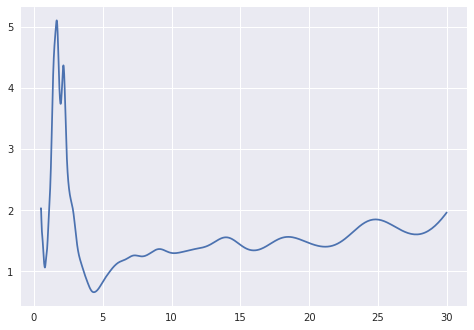

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

with plt.style.context('seaborn'):
    plt.plot(hv.frq, hv.mean_curve(distribution_mc))
# plt.plot(hv.frq, hv.mean_curve(distribution_mc))

In [22]:
sorted(path_mseed.iterdir())[11:]

[PosixPath('YXMK/YXsac/YXmseed/Line1/011'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/012'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/013'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/014'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/015'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/016'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/017'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/018'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/019'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/020'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/021'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/022'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/023'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/024'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/025'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/026'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/027'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/028'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/029'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/030'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/031'),
 PosixPath('YXMK/YXsac/YXmseed/Line1/032'),
 PosixPath('YXMK/YXsac/YXmseed/L

In [24]:
import pathlib
import numpy as np

path_mseed = pathlib.Path('./YXMK/YXsac/YXmseed/Line1/')
hvs = {}

for file in sorted(path_mseed.iterdir())[13:]:
    print(file)
    print('------------------')
    trace1 = []
    trace2 = []
    trace3 = []

    for mseed in sorted(file.glob('*.mseed'), key=lambda x: int(x.stem.split('hour')[1])):
        test = obspy.read(str(mseed))
        trace1.append(test[0])
        trace2.append(test[1])
        trace3.append(test[2])

    trace11 = trace1[0]
    trace22 = trace2[0]
    trace33 = trace3[0]

    for i in trace1[1:]:
        trace11.data = np.hstack((trace11.data, i.data))

    for i in trace2[1:]:
        trace22.data = np.hstack((trace22.data, i.data))
        
    for i in trace3[1:]:
        trace33.data = np.hstack((trace33.data, i.data))
        
    # st = obspy.Stream([trace11, trace22, trace33])
    # st.write('test.mseed', format='MSEED')

    # try:
    # sensor = hvsrpy.Sensor3c.from_mseed('test.mseed')

    sensor = hvsrpy.Sensor3c.from_Stream(obspy.Stream([trace11, trace22, trace33]))

    bp_filter = {"flag":filter_bool, 
                "flow":filter_flow, 
                "fhigh":filter_fhigh, 
                "order":filter_order}

    resampling = {"minf":resample_fmin, 
                "maxf":resample_fmax, 
                "nf":resample_fnum, 
                "res_type":resample_type}

    hv = sensor.hv(windowlength, 
                bp_filter, 
                width, 
                bandwidth, 
                resampling, 
                method, 
                f_low=peak_f_lower, 
                f_high=peak_f_upper, 
                azimuth=azimuth)
    name = str(file.stem)
    hvs[name] = hv.mean_curve(distribution_mc)
    print('Done! ', name)

    # except:
    #     print('Error! ', file.stem)
    #     continue


YXMK/YXsac/YXmseed/Line1/013
------------------
Done!  013
YXMK/YXsac/YXmseed/Line1/014
------------------
Done!  014
YXMK/YXsac/YXmseed/Line1/015
------------------
Done!  015
YXMK/YXsac/YXmseed/Line1/016
------------------
Done!  016
YXMK/YXsac/YXmseed/Line1/017
------------------
Done!  017
YXMK/YXsac/YXmseed/Line1/018
------------------
Done!  018
YXMK/YXsac/YXmseed/Line1/019
------------------
Done!  019
YXMK/YXsac/YXmseed/Line1/020
------------------
Done!  020
YXMK/YXsac/YXmseed/Line1/021
------------------
Done!  021
YXMK/YXsac/YXmseed/Line1/022
------------------
Done!  022
YXMK/YXsac/YXmseed/Line1/023
------------------
Done!  023
YXMK/YXsac/YXmseed/Line1/024
------------------
Done!  024
YXMK/YXsac/YXmseed/Line1/025
------------------


KeyboardInterrupt: 

In [11]:
file.stem

'001'

In [14]:
len(hvs)

12

In [25]:
np.save('hvs13_24.npy', hvs)

In [26]:
hv1 = np.load('hvs12.npy', allow_pickle=True).item()
hv2 = np.load('hvs13_24.npy', allow_pickle=True).item()

In [29]:
hv1.update(hv2)

In [31]:
len(hv1)



24

In [ ]:
fft_freqs = np.fft.fftfreq(len(trace11.data), d=trace11.stats.delta)


fft_E = np.fft.fft(trace11.data)
fft_N = np.fft.fft(trace22.data)
fft_U = np.fft.fft(trace33.data)

In [16]:
hv_list = []
for value in hvs.values():
    hv_list.append(value)

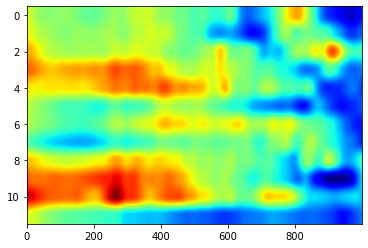

In [ ]:
hv_list = np.array(hv_list)

plt.imshow(hv_list.T, cmap='jet', aspect='auto')

In [37]:
np.save('hvs1_24.npy', hvs)

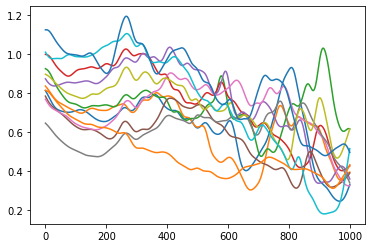

In [18]:
for i in hv_list:
    plt.plot(i)

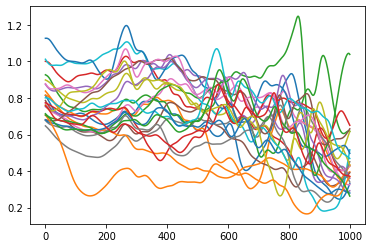

In [34]:
hvs_list = []
for key, value in hv1.items():
    hvs_list.append(value)
    plt.plot(value, label=key)

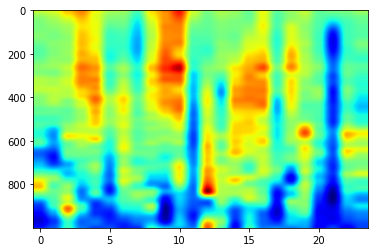

In [35]:
hvs_list = np.array(hvs_list)

plt.imshow(hvs_list.T, cmap='jet', aspect='auto')